<a href="https://colab.research.google.com/github/levi-wj/bike_case_study/blob/main/notebooks/starter_bikes_Josh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [4]:
bikes.describe()

,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
count,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000
mean,11.501098,90.434612,249.193625,15.376487,14.659325,0.636624,13.100614,1.405441,2.495799,0.030300,0.684312
std,6.921864,128.655621,258.267544,9.749467,11.428324,0.190328,7.857600,0.683450,1.101152,0.171412,0.464791
min,0.000000,0.000000,0.000000,-14.700000,-24.000000,0.088900,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,7.000000,48.000000,7.600000,5.400000,0.484100,7.700000,1.000000,2.000000,0.000000,0.000000
50%,12.000000,36.000000,180.000000,16.000000,16.000000,0.640900,12.200000,1.000000,2.000000,0.000000,1.000000
75%,18.000000,122.000000,360.000000,23.500000,23.500000,0.798800,17.500000,2.000000,3.000000,0.000000,1.000000
max,23.000000,1244.000000,1702.000000,40.500000,49.600000,1.000000,69.800000,4.000000,4.000000,1.000000,1.000000


In [3]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# one hot encode dteday

bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['year'] = bikes['dteday'].dt.year
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day

dteday_encoded = pd.get_dummies(bikes[['year', 'month', 'day']], columns=['year', 'month', 'day'])
bikes = pd.concat([bikes, dteday_encoded], axis=1)
bikes = bikes.drop(['dteday', 'year', 'month', 'day'], axis = 1)

KeyError: 'dteday'

In [33]:
bikes['total'] = bikes.casual + bikes.registered
bikes

,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,total
0,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,...,False,False,False,False,False,False,False,False,False,16
1,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,...,False,False,False,False,False,False,False,False,False,38
2,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,...,False,False,False,False,False,False,False,False,False,31
3,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,...,False,False,False,False,False,False,False,False,False,12
4,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,...,False,False,False,False,False,False,False,False,True,835
112471,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,...,False,False,False,False,False,False,False,False,True,621
112472,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,...,False,False,False,False,False,False,False,False,True,578
112473,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,...,False,False,False,False,False,False,False,False,True,363


In [34]:
X = bikes.drop(['casual', 'registered', 'total'], axis=1)
y = bikes.total

X

,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year_2011,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.0,3.0,3.0,0.7957,0.8,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1.7,1.7,0.8272,0.8,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.9,1.9,0.8157,1.1,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
3,3.0,2.5,2.5,0.7831,0.8,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,4.0,2.0,2.0,0.8075,1.1,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,19.0,10.2,10.2,0.4516,8.4,2,4,0,1,False,...,False,False,False,False,False,False,False,False,False,True
112471,20.0,8.9,7.5,0.5268,9.3,1,4,0,1,False,...,False,False,False,False,False,False,False,False,False,True
112472,21.0,7.7,6.4,0.5756,7.8,1,4,0,1,False,...,False,False,False,False,False,False,False,False,False,True
112473,22.0,8.0,8.0,0.5604,0.0,1,4,0,1,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
y_train

,total
22023,558
30281,337
83263,613
63147,289
18592,158
...,...
76820,100
110268,51
103694,18
860,67


In [37]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [38]:
model = Sequential()
model.add(Dense(256, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          31,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,073 (637.00 KB)

 Trainable params: 163,073 (637.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [44]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 40664.0352 - mse: 40664.0352 - val_loss: 33970.8945 - val_mse: 33970.8945
Epoch 2/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 38498.0664 - mse: 38498.0664 - val_loss: 33579.9219 - val_mse: 33579.9219
Epoch 3/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 37238.1016 - mse: 37238.1016 - val_loss: 32150.7578 - val_mse: 32150.7578
Epoch 4/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 35965.7305 - mse: 35965.7305 - val_loss: 31651.4199 - val_mse: 31651.4199
Epoch 5/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 35604.2578 - mse: 35604.2578 - val_loss: 30548.5234 - val_mse: 30548.5234
Epoch 6/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 34865.7578 - mse: 34865.7578 - val_loss: 29706.7539 - val_mse: 29706.7539
Epoch 7/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 33963.7695 - mse: 33963.7695 - val_loss: 28984.8301 - val_mse: 28984.8301
Epoch 8/2000
2925/2925 ━━━━━━━

In [45]:
hist

,loss,mse,val_loss,val_mse
0,39831.585938,39831.585938,33970.894531,33970.894531
1,37944.214844,37944.214844,33579.921875,33579.921875
2,36651.468750,36651.468750,32150.757812,32150.757812
3,35545.773438,35545.773438,31651.419922,31651.419922
4,34908.851562,34908.851562,30548.523438,30548.523438
5,34162.371094,34162.371094,29706.753906,29706.753906
6,33568.003906,33568.003906,28984.830078,28984.830078
7,32571.101562,32571.101562,28435.232422,28435.232422
8,31734.480469,31734.480469,27641.392578,27641.392578
9,31030.544922,31030.544922,25993.322266,25993.322266


KeyError: 'index'

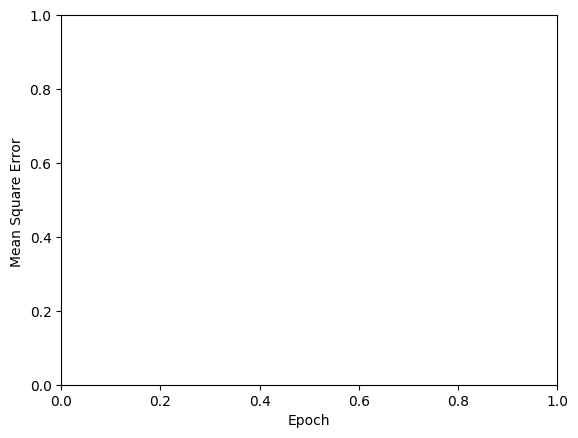

In [46]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
predictions = np.round(model.predict(X_test),1)

In [ ]:
predictions

In [ ]:
result = mean_squared_error(y_test, predictions, squared=False)
result

In [ ]:
r2 = r2_score(y_test,predictions)
r2